# Plot meta-analysis of feature importance

---
Authorship: Marie-anne

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os, glob


In [5]:
def get_rank(df, ascending=False):
    def add_rank(df):
        ranked =[]
        for col in df.columns:
            name = 'rank_' + col
            ranked.append(name)
            df[name] = df[col].rank(ascending=ascending)
        df = df[ranked]
        return df
    
    ranked_df = add_rank(df)
    ranked_df = ranked_df.mean(axis=1).round(0).sort_values(ascending=True)
    return ranked_df

In [44]:
def plot_rank(meta_df, name):
    graph = meta_df.loc[meta_df.mean(1).iloc[:6].index].transpose()

    ax = graph.plot(marker='o', ms= 8, mfc=(1,1,1), mew=2.5,
                    lw = 3, alpha=0.8,
                    color=sns.cubehelix_palette(6, reverse=True),
                    figsize=(4.5,4),
                    ylim=(0, graph.max().max()+1), legend=False)

    ax.invert_yaxis()
    plt.xticks(np.arange(3), graph.index, fontsize=16)
    plt.yticks(np.arange(1, graph.max().max()+1), fontsize=14)
    plt.tick_params(left=False, bottom=False)
    plt.ylabel('Rank', fontsize=18, fontweight='semibold')
    plt.grid(axis='y', lw=0.4)
    plt.title(name + ' meta-analysis', fontsize=19, fontweight='semibold')

    for line, name in zip(ax.lines, graph.columns):
        y = line.get_ydata()[-1]    
        print(name)
        ax.annotate(name, xy=(1,y), xytext=(6,0), color= 'k', 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=14, va="center")

    sns.despine(left=True, bottom=True)


/home/marie-anne/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/marie-anne/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


doctor_recc_h1n1
opinion_h1n1_vacc_effective
opinion_h1n1_risk
health_worker
opinion_seas_risk
opinion_seas_vacc_effective
opinion_seas_risk
doctor_recc_seasonal
opinion_seas_vacc_effective
age_group
health_worker
h1n1_knowledge


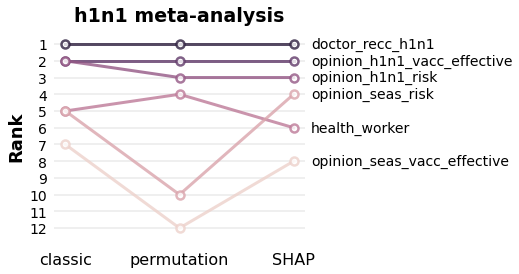

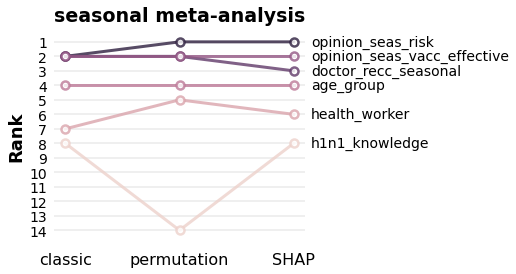

In [46]:
for file in glob.glob('Results/*imp.xlsx'):
    if file.split('_')[1] == 'h1n1WoDr' or file.split('_')[1]== 'seasonalWoDr':
        continue
    dfs = pd.read_excel(file, sheet_name=None, index_col='Unnamed: 0')
    name = file.split('_')[1]
    temp_df = []
    
    for df_name, df in dfs.items():
        rank_test = get_rank(df)
        temp_df.append(rank_test)
    meta_df = pd.concat(temp_df, axis=1)
    meta_df.columns = ['classic', 'permutation', 'SHAP']
    plot_rank(meta_df, name)
    plt.savefig(os.path.join(os.getcwd(), 'Feat_imp_plot/{}_top6.png'.format(name)), bbox_inches='tight')

In [460]:
def graph_meta_meta(dic_df):
    temp_df = []
    for df_name, df in dic_df.items():
            df_Test = df
            temp_df.append(rank_test)
    meta_df = pd.concat(temp_df, axis=1)
    meta_df.columns = ['classic', 'permutation', 'SHAP']
    std = MinMaxScaler()
    std_df = std.fit_transform(df_Test)
    std_graph = pd.DataFrame(std_df, columns = df_Test.columns, index = df_Test.index)

    return std_graph

h1n1
h1n1
seasonal
seasonal


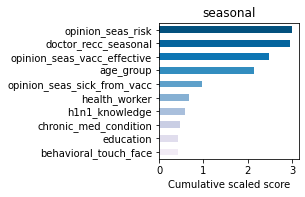

In [479]:
for file in glob.glob('Results/*imp.xlsx'):
    dfs = pd.read_excel(file, sheet_name=None, index_col='Unnamed: 0')
    name = file.split('_')[1]
   
    if name == 'h1n1WoDr':
        name= 'h1n1'
    if name == 'seasonalWoDr':
        name = 'seasonal'
    print(name)
    temp_df = []
    std_graph = graph_meta_meta(dfs)
    std_graph.sum(1).sort_values(ascending=True).iloc[-10:].plot.barh(figsize=(2.5,2.5), 
                                                                  color=sns.color_palette(palette='PuBu', n_colors=10), 
                                                                  legend=False, 
                                                                  title=name, 
                                                                 )
    plt.xlabel('Cumulative scaled score')
    plt.savefig(os.path.join(os.getcwd(), 'Feat_imp_plot/{}_metax2.png'.format(name)), bbox_inches='tight')


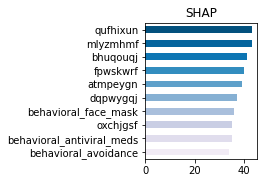

In [396]:
for file in glob.glob('Results/*imp.xlsx'):

    dfs = pd.read_excel(file, sheet_name=None, index_col='Unnamed: 0')
    name = file.split('_')[1]
    for df_name, df in dfs.items():
        rank_test = get_rank(df)
        rank_test.iloc[-10:].plot.barh(figsize=(2,2.5), color=sns.color_palette(palette='PuBu', n_colors=10), legend=False, title=df_name)
        plt.savefig(os.path.join(os.getcwd(), 'Feat_imp_plot/{}_{}_top10.png'.format(name, df_name)), bbox_inches='tight')